In [1]:
# To run this, I first created a clean python 3.10 virtual environment with `python -m venv env_qb_gsee_benchmark`, 
# activated the environment `source env_qb_gsee_benchmark/bin/activate`, ran `python -m pip install notebook`, 
# then ran this notebook in VS Code.

# Install pip packages in the current Jupyter kernel (from https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
import sys
!{sys.executable} -m pip install --extra-index-url=https://block-hczhai.github.io/block2-preview/pypi/ git+https://github.com/jtcantin/dmrghandler
# Initial installation took 5 min

Looking in indexes: https://pypi.org/simple, https://block-hczhai.github.io/block2-preview/pypi/
  Cloning https://github.com/jtcantin/dmrghandler to /tmp/pip-req-build-wyj02009
  Running command git clone --filter=blob:none --quiet https://github.com/jtcantin/dmrghandler /tmp/pip-req-build-wyj02009
  Resolved https://github.com/jtcantin/dmrghandler to commit 3f6d96636b992a3266b004e0bf772c885412718d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# %matplotlib widget
import dmrghandler.energy_extrapolation as ee
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stats
from pathlib import Path

In [3]:
bd_stop_threshold = 0.01
bd_last_index_shift = 0
bd_num_initial_points = 3

energy_stop_val = 0.001
energy_last_index_shift = -1
energy_num_initial_points = 3

sort_by = "bond_dimension"

In [4]:
# fcidump_file = "FCIDUMP_L_4x4_Ut_8.0"
# calc_UUID = "91df2a51-ec2d-48c1-a44d-e47321fd2dc6" # point index =  ;
# fcidump_file = "FCIDUMP_L_6x6_Ut_2.0"
# calc_UUID = "33ab744c-b8f9-4bf2-94a7-e9e959393dc1" # point index =  ;
# fcidump_file = "FCIDUMP_L_6x6_Ut_4.0"
# calc_UUID = "b80febb1-ee19-43bf-bd14-f94575dfc0ee" # point index =  ;
# fcidump_file = "FCIDUMP_L_6x6_Ut_8.0"
# calc_UUID = "c40f5a7c-9c51-4a26-956a-e01ac591daf9" # point index =  ;
# fcidump_file = "FCIDUMP_b_cc-pvdz"
# calc_UUID = "3ec57d84-4297-411b-a9e2-4dc8271a8925" # point index =  ;
# fcidump_file = "FCIDUMP_b_sto-3g"
# calc_UUID = "301f3dd5-58c8-45e7-8af1-27dece173fe2" # point index =  ;
# fcidump_file = "FCIDUMP_d_1.68_b_cc-pvdz-dk_ne_12"
# calc_UUID = "d77121f6-1c20-4d1f-a92a-9c3d997f775c" # point index =  ;
# fcidump_file = "FCIDUMP_d_1.68_b_cc-pvdz-dk_ne_28"
# calc_UUID = "f872bf92-5f9b-4dcb-a69d-9c9b5b3a0644" # point index =  ;
# fcidump_file = "FCIDUMP_d_1.68_b_sto-3g_ne_28"
# calc_UUID = "2f32b0c6-5af1-4ae7-94f1-88a115e17395" # point index =  ;
# fcidump_file = "FCIDUMP_d_2.0_b_cc-pvdz-dk_ne_12"
# calc_UUID = "caf517af-dfb9-4a5f-90b9-08e6f2c76b3b" # point index =  ;
# fcidump_file = "FCIDUMP_d_2.0_b_cc-pvdz-dk_ne_28"
# calc_UUID = "ed6e21a0-81e2-4d5d-8e8a-620f0c6ee99e" # point index =  ;
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_12"
# calc_UUID = "7f88f924-f572-4caf-a503-d699fb94e779" # point index =  ;
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_28"
# calc_UUID = "5e9c375c-8e68-4942-a291-c7de82fe893e" # point index =  ;
# fcidump_file = "FCIDUMP_d_3.0_b_cc-pvdz-dk_ne_12"
# calc_UUID = "27df35cb-a60f-41a8-a7ad-bdc97a4350c1" # point index =  ;
# fcidump_file = "FCIDUMP_d_3.0_b_cc-pvdz-dk_ne_28"
# calc_UUID = "74298482-34fd-47b8-90b9-75a3b792a4e0" # point index =  ;
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_12"
# calc_UUID = "eb5136f2-c83e-4eec-8fcb-5c95f85ed2f2" # point index =  ;
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_28"
# calc_UUID = "dd18bb39-6f67-49d8-96b5-798a549a8380" # point index =  ;
# fcidump_file = "FCIDUMP_g_bent_b_cc-pvdz"
# calc_UUID = "cd1e3451-84cf-4eab-9e17-da1473ba6c29" # point index =  ;
# fcidump_file = "FCIDUMP_g_bent_b_cc-pvtz"
# calc_UUID = "3763f681-3cdc-4524-85e9-4d47ac2c0bc4" # point index =  ;
# fcidump_file = "FCIDUMP_g_ring_b_cc-pvdz"
# calc_UUID = "07d486cf-b7a5-4427-b21b-881a5bf981cd" # point index =  ;
# fcidump_file = "FCIDUMP_g_ring_b_cc-pvtz"
# calc_UUID = "90d20e14-7c18-4354-8de2-27e2a1360103" # point index =  ;



# fcidump_file = "FCIDUMP_L_6x6_Ut_2.0"
# calc_UUID = "e14e1a8a-5a8c-4efa-891e-a09fdc45efb8"
# fcidump_file = "FCIDUMP_L_6x6_Ut_4.0"
# calc_UUID = "82762dcb-3260-4772-9410-657cbfe80237"
fcidump_file = "FCIDUMP_L_6x6_Ut_8.0"   
calc_UUID = "3cc3c421-93d7-4d36-a717-96b85e5cf1fa" # point index =  6; -16.486264120751258,0.0006752100901260352,12231,11164,13419
# fcidump_file = "FCIDUMP_b_cc-pvdz"
# calc_UUID = "df22f65d-ee8f-4f89-93e2-f5183df86052"
# fcidump_file = "FCIDUMP_b_sto-3g"
# calc_UUID = "2e810de4-9276-4551-9090-adff21bd3fdf"
# fcidump_file = "FCIDUMP_d_1.68_b_cc-pvdz-dk_ne_12"
# calc_UUID = "8180f3d5-227a-4367-ab2a-d0b1a3bdbfa6"
# fcidump_file = "FCIDUMP_d_1.68_b_cc-pvdz-dk_ne_28"
# calc_UUID = "e0a6f050-c351-4afc-87ee-630b134f7633"
# fcidump_file = "FCIDUMP_d_1.68_b_sto-3g_ne_12"
# calc_UUID = "cddfd0fb-521a-4026-a6ed-e8d9ab857d3f"
# fcidump_file = "FCIDUMP_d_1.68_b_sto-3g_ne_28"
# calc_UUID = "5553b67e-70b1-4b00-8f58-b2e2f6e130b7"
# fcidump_file = "FCIDUMP_d_2.0_b_cc-pvdz-dk_ne_12"
# calc_UUID = "d5d3afb5-c4fa-416c-958a-1758ba62cfdb"
# fcidump_file = "FCIDUMP_d_2.0_b_cc-pvdz-dk_ne_28"
# calc_UUID = "c99a0469-be93-4f8a-949d-9e85d95e7f7d"
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_12"
# calc_UUID = "86da03bf-9604-403e-9794-7cbf2718e2ea" # point index =  0; three points -129.33984588237226,9.373647729860256e-05,84,68,104
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_28"
# calc_UUID = "e7592f67-97b5-4bb8-833c-b15f68ed5827" # point index = 3; -470.74236137022064,0.01355138309888761,5198,3861,7116
# bd_stop_threshold = 0.03
# energy_stop_val = 0.01

# fcidump_file = "FCIDUMP_d_3.0_b_cc-pvdz-dk_ne_12"
# calc_UUID = "f888c7a8-fa98-4618-bf65-5e22a437eb8d" # point index =  0; three points -213.86938318739345,0.003194943990275421,735,67,62010
# fcidump_file = "FCIDUMP_d_3.0_b_cc-pvdz-dk_ne_28"
# calc_UUID = "ce96d925-667f-4f25-85d5-c619df4fb292"
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_12"
# calc_UUID = "17e71761-7dab-4086-bc0e-f2c7c563c966" # point index = 0 ; three points -156.77396020117052,1.7462244843559112e-06,89,7,2814
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_28"
# calc_UUID = "79192bbd-cb8b-4ff3-986b-dc7bd61bab48"
# fcidump_file = "FCIDUMP_g_bent_b_cc-pvtz"
# calc_UUID = "8f37335a-a9b0-44bd-8f8c-c46ad620199e"
# fcidump_file = "FCIDUMP_g_ring_b_cc-pvdz"
# calc_UUID = "4b4c321e-9d4f-4a77-b974-60f196600970" # point index =  2; -224.8762049443819,0.002961311473403899,37535,13927,126037
# fcidump_file = "FCIDUMP_g_ring_b_cc-pvtz"
# calc_UUID = "03d248fe-110a-495f-86ca-1822f33f6184"

### prepare_calcs_gsee_benchmark_coarse_set_run5.py
### ########################################################
# fcidump_file = "FCIDUMP_L_6x6_Ut_2.0"
# calc_UUID = "258d7586-e8cb-4ecf-9266-487f8f5ab7ac" # point index = 1 ; BAD -38.17621853655661,0.07391859913538647,65077478,58582229,72401863
# energy_stop_val = 0.1
# # energy_last_index_shift = -2
# # energy_num_initial_points = 4
# fcidump_file = "FCIDUMP_L_6x6_Ut_4.0"
# calc_UUID = "247d84b9-5c7c-49f7-83bc-ddcaa2868314" # point index = 0 ; QUADRATIC APPROACH? -27.22403873581588,0.010629881166507638,70757,66382,75470
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_b_sto-3g"
# calc_UUID = "78d3b2f0-7d9d-4ca6-9afb-048c320a520d" # point index = 2 ; BAD -64.41841060520885,0.011852950409136568,381305,278933,530154
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_d_1.68_b_sto-3g_ne_12"
# calc_UUID = "77e8718a-17e7-4710-9273-bf57c39f8abe" # point index =  ;
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_d_1.68_b_sto-3g_ne_28"
# calc_UUID = "2bee219c-de13-46d0-9e0b-55ed8c05a61d" # point index =  ;
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_12"
# calc_UUID = "5c07263f-9f70-428c-901c-ccd1b841f422" # point index =  ;
# fcidump_file = "FCIDUMP_d_2.0_b_sto-3g_ne_28"
# calc_UUID = "13215551-94fc-4813-b4bf-ce5d459ef306" # point index = 0 ; -470.71851285674086,0.0006130541128628579,3087,2366,4078
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_12"
# calc_UUID = "0e74f7aa-31f0-494c-b9d2-c83ff654074d" # point index = 0 ; GET MORE POINTS -156.70177068781115,4.558106048901648e-06,18,36,443
# energy_stop_val = 0.1
# fcidump_file = "FCIDUMP_d_3.0_b_sto-3g_ne_28"
# calc_UUID = "6b3a675b-80b8-4d05-919b-33d1124fd119" # point index =  ;
# fcidump_file = "FCIDUMP_g_ring_b_cc-pvdz"
# calc_UUID = "be3636dd-1f57-4bde-abaf-0055c4dcf78e" # point index = 1 ; BAD -224.87529291453473,0.023364230066778208,27140,7655,139999
# energy_stop_val = 0.1


In [5]:
# fcidump.21_rc_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}
# Read CSV file
private_path_2_file = "private_path_2.txt"
private_path_2 = Path(private_path_2_file).read_text().strip()


excel_storage_path = private_path_2 / Path("zapata/gsee_benchmark_results/coarse_set/")
csv_storage_path = excel_storage_path/Path("performance_metrics_store")
data_store_location = csv_storage_path
# fcidump_file = "fcidump.29_2_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}"
# fcidump_file = "fcidump.21_rc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
# fcidump_file = "fcidump.27_pc_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
# fcidump_file = "fcidump.29_2_{'Mo'_ 'def2-SVP', 'I'_ 'def2-SVP', 'Cl'_ 'def2-SVP', 'default'_ '6-311+G(d,p)'}"
data = np.genfromtxt(data_store_location/Path(fcidump_file+"_"+calc_UUID+".csv"), delimiter=',', skip_header=1)
# loop_indices = data[:, 0]
dmrg_energies = data[:, 0]
bond_dimensions = data[:, 1]
discarded_weights = data[:, 2]

In [6]:
# print('Loop indices:', loop_indices)
print('DMRG energies:', dmrg_energies)
print('Bond dimensions:', bond_dimensions)
print('Discarded weights:', discarded_weights)

DMRG energies: [-16.26126696 -16.28777561 -16.30796665 -16.32705629 -16.34489111
 -16.36079769 -16.37522794 -16.38829382 -16.39981129 -16.41066677
 -16.4196283  -16.42784471 -16.43470265 -16.44104019 -16.44649946
 -16.45125507 -16.45561873 -16.45931588 -16.46257501 -16.46552173
 -16.46788213]
Bond dimensions: [ 300.  330.  364.  401.  442.  487.  536.  590.  649.  714.  786.  865.
  952. 1048. 1153. 1269. 1396. 1536. 1690. 1860. 2047.]
Discarded weights: [5.75825163e-04 5.39411444e-04 4.85580224e-04 4.47980986e-04
 4.12348834e-04 3.77180431e-04 3.42803937e-04 2.91630496e-04
 2.49061928e-04 2.25435249e-04 2.00891411e-04 1.87325628e-04
 1.61907071e-04 1.40566528e-04 1.23589876e-04 1.09040405e-04
 9.67530835e-05 8.46166890e-05 7.41083354e-05 6.62465277e-05
 5.59422868e-05]


In [7]:
# Sort data based on bond dimension
if sort_by == "bond_dimension":
    sorted_indices = np.argsort(bond_dimensions)
elif sort_by == "discarded_weights":
    sorted_indices = np.argsort(discarded_weights)[::-1]
else:
    raise ValueError("Invalid sorting key")
sorted_bond_dimensions = bond_dimensions[sorted_indices]
sorted_dmrg_energies = dmrg_energies[sorted_indices]
sorted_discarded_weights = discarded_weights[sorted_indices]


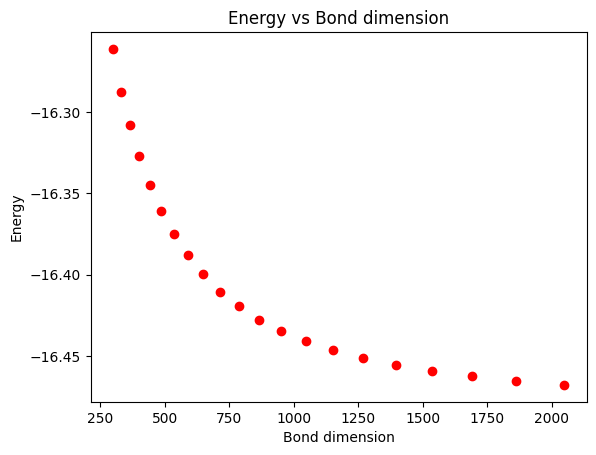

In [8]:
#Plot energy vs bond dimension,
plt.plot(sorted_bond_dimensions, sorted_dmrg_energies, 'ro')
plt.xlabel('Bond dimension')
plt.ylabel('Energy')
plt.title('Energy vs Bond dimension')
plt.show()

In [9]:
# # REmove points 4 and 7
# sorted_bond_dimensions = np.delete(sorted_bond_dimensions, [-3, -7])
# sorted_dmrg_energies = np.delete(sorted_dmrg_energies, [-3, -7])
# sorted_discarded_weights = np.delete(sorted_discarded_weights, [-3, -7])

# # Keep last 10 points
# sorted_bond_dimensions = sorted_bond_dimensions[-10:]
# sorted_dmrg_energies = sorted_dmrg_energies[-10:]
# sorted_discarded_weights = sorted_discarded_weights[-10:]

# print('DMRG energies:', dmrg_energies)
# print('Bond dimensions:', bond_dimensions)
# print('Discarded weights:', discarded_weights)

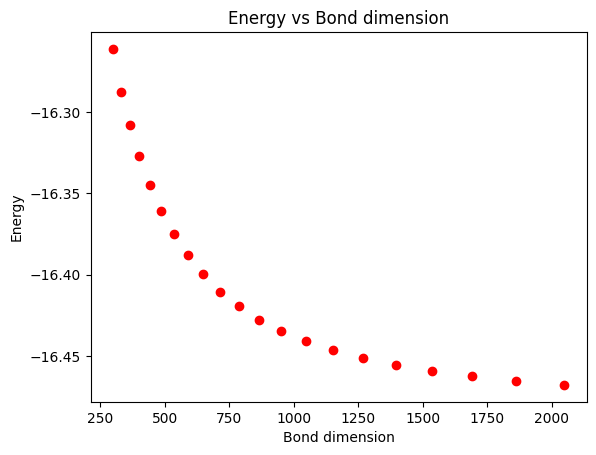

In [10]:
#Plot energy vs bond dimension,
plt.plot(sorted_bond_dimensions, sorted_dmrg_energies, 'ro')
plt.xlabel('Bond dimension')
plt.ylabel('Energy')
plt.title('Energy vs Bond dimension')
plt.show()

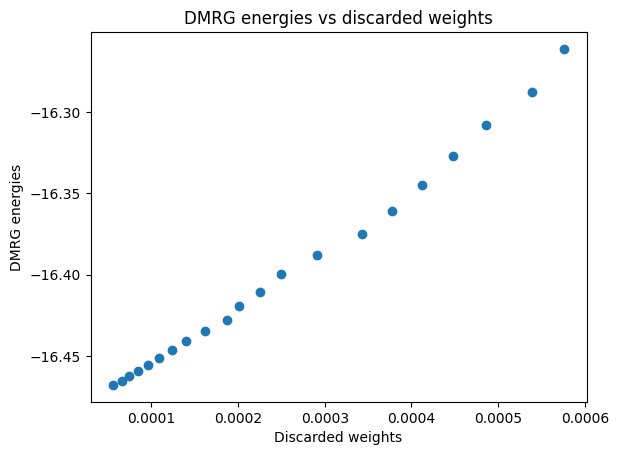

In [11]:
#Plot energy vs discarded weights
fig, ax = plt.subplots()
ax.plot(sorted_discarded_weights, sorted_dmrg_energies, 'o')
ax.set_xlabel('Discarded weights')
ax.set_ylabel('DMRG energies')
ax.set_title('DMRG energies vs discarded weights')
plt.show()

Deviation of new point from fit line is too much. Stopping...
Deviation of new point from fit line is too much. Stopping...
Deviation of new point from fit line is too much. Stopping...
Deviation of new point from fit line is too much. Stopping...
Deviation of new point from fit line is too much. Stopping...
Relative Deviation of new point from fit line is 0.001500076312840548 > 0.001. Stopping...
Deviation of new point from fit line is too much. Stopping...


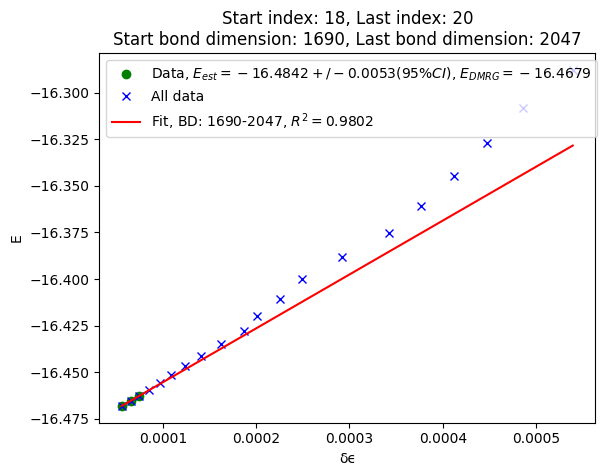

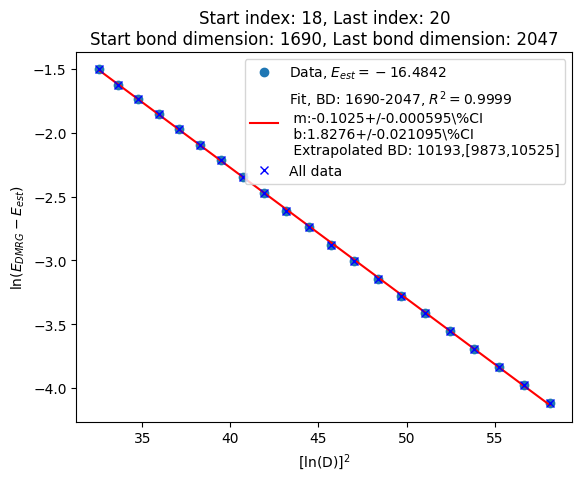

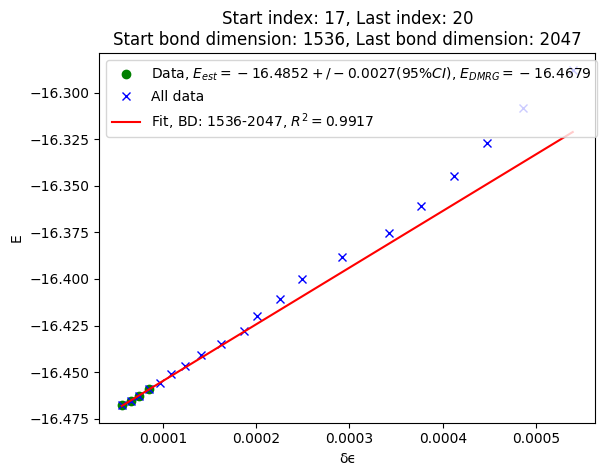

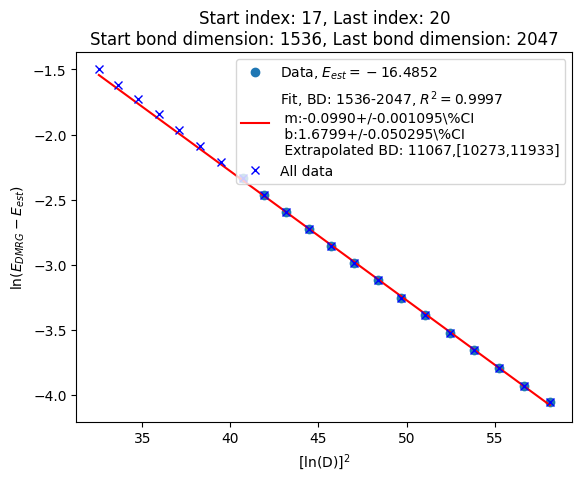

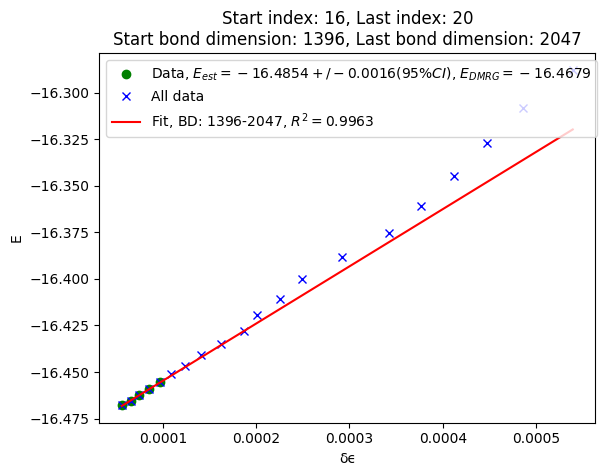

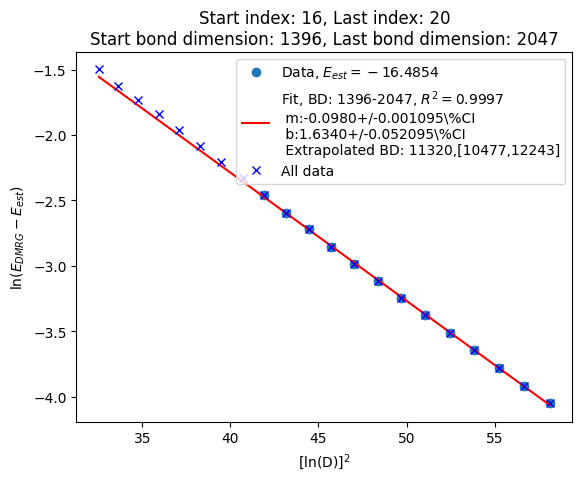

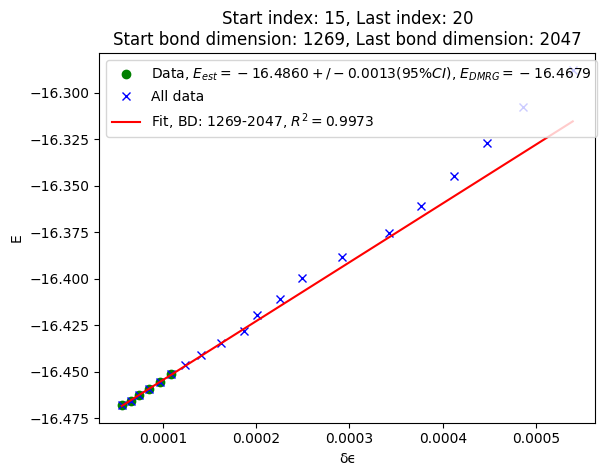

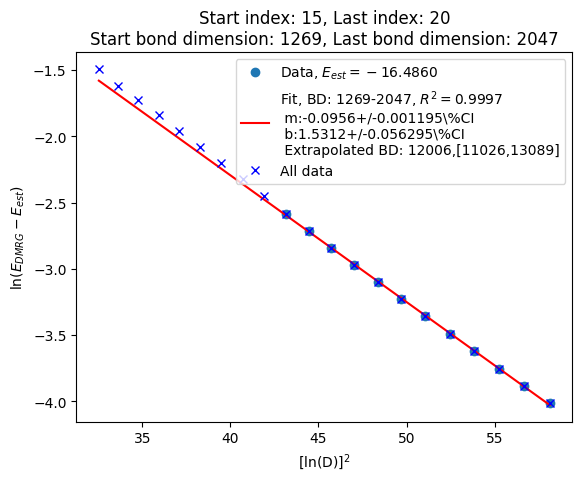

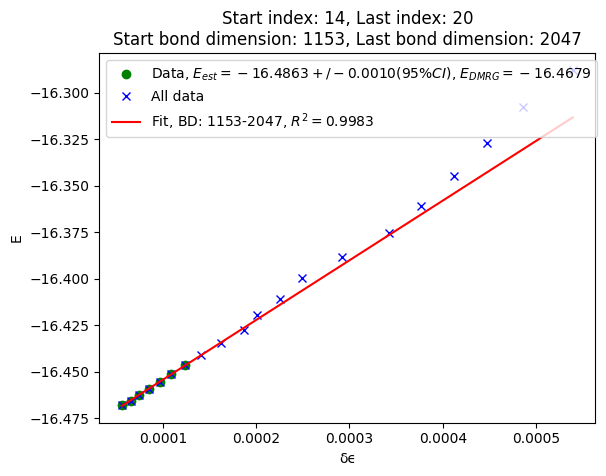

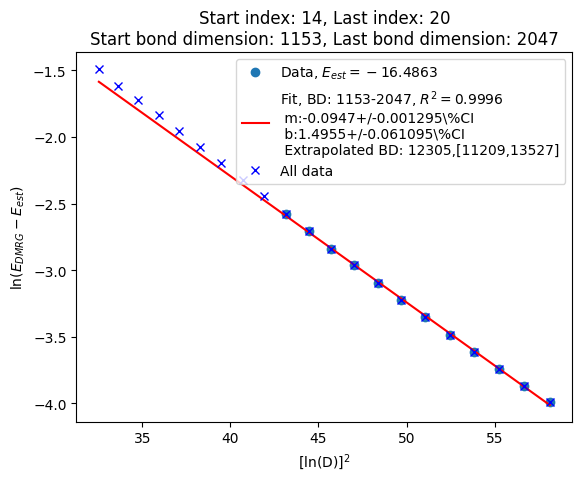

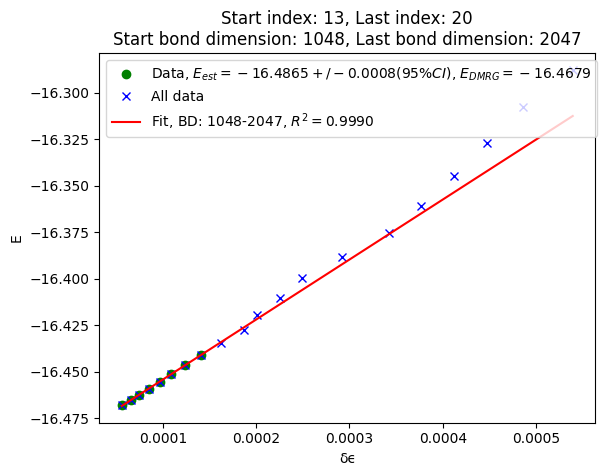

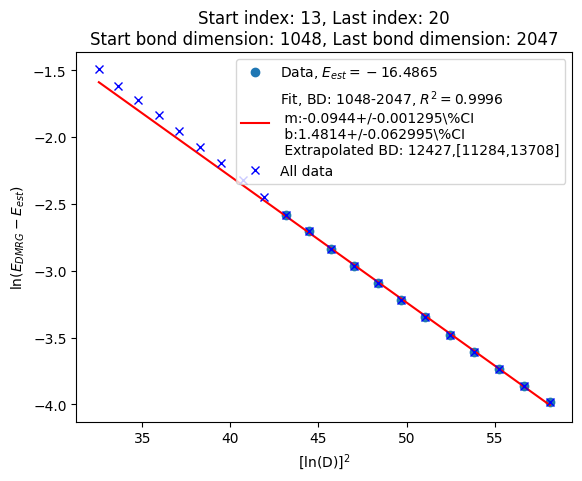

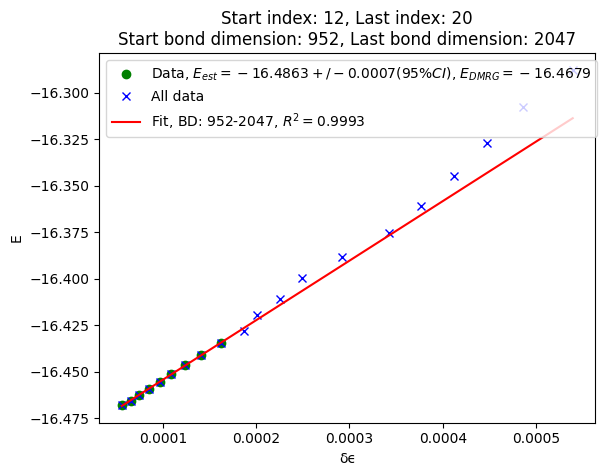

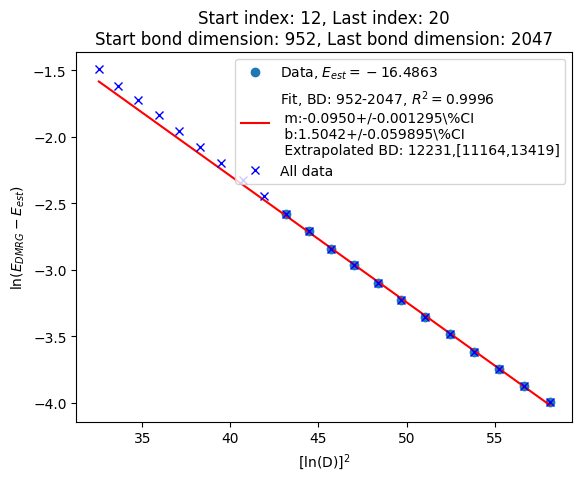

In [12]:
# num_keep = len(sorted_bond_dimensions)
# num_keep = 10


# num_keep_list = [3,4,5,6,7,8,9,10]
# num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# num_keep_list = np.arange(3, 25)
fitting_dict_list = []
# for start_index in range(0, len(sorted_bond_dimensions)):
num_points = len(sorted_bond_dimensions)
small_r_squared_once = False
start_bond_dimension_list = []
est_energies_list = []
r_squared_list = []
# num_keep_list_final = []
intercept_stderr_list = []
slope_stderr_list = []
slope_list = []
last_index_list = []
last_bond_dimension_list = []
best_dmrg_energy_list = []
bd_intercept_list = []
bd_slope_list = []
bd_R_squared_list = []
bd_intercept_stderr_list = []
bd_slope_stderr_list = []
bd_extrapolated_bd_list = []
bd_max_bd_list = []
bd_min_bd_list = []
break_now = False
for start_index in range(num_points-energy_num_initial_points, -1, -1):
# for start_index in range(0, 10):
        if break_now:
            break
        # for last_index in range(start_index + 2, len(sorted_bond_dimensions)):
        last_index = num_points + energy_last_index_shift
        # last_index = num_points - 1
        kept_bond_dimensions = sorted_bond_dimensions[start_index : last_index + 1]
        kept_dmrg_energies = sorted_dmrg_energies[start_index : last_index + 1]
        kept_discarded_weights = sorted_discarded_weights[start_index : last_index + 1]

        # print("Number of kept bond dimensions:", len(kept_bond_dimensions))
        # print("Kept bond dimensions:", kept_bond_dimensions)
        # print("Kept DMRG energies:", kept_dmrg_energies)
        # print("Kept discarded weights:", kept_discarded_weights)

        # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
        #     energies_dmrg=kept_dmrg_energies,
        #     independent_vars=kept_discarded_weights,
        #     extrapolation_type= "discarded_weight",
        #     past_parameters = None,
        #     verbosity=2,
        # )
        slope, intercept, R_squared, slope_stderr, intercept_stderr = (
            ee.discarded_weight_linear_fitting(
                discarded_weights=kept_discarded_weights,
                dmrg_energies=kept_dmrg_energies,
            )
        )
        if slope < 0:
            print("Slope is negative. Skipping...")
            continue

        # If deviation of new point from fit line is too much, stop
        next_discarded_weight = sorted_discarded_weights[start_index-1]
        next_energy = sorted_dmrg_energies[start_index-1]
        predicted_energy = slope * next_discarded_weight + intercept
        # RMSE = np.sqrt(np.mean((kept_dmrg_energies - (slope * kept_discarded_weights + intercept))**2))
        # if np.abs((next_energy - predicted_energy)) > 10*RMSE:
        #     print(f"Relative Deviation of new point from fit line is {np.abs((next_energy - predicted_energy)) }, compared to 10*RMSE of {10*RMSE}. Stopping...")
        #     break_now = True
        # energy_stop_val = 0.001
        # stop_val = 0.01
        if np.abs((next_energy - predicted_energy)) > energy_stop_val:
            print(f"Relative Deviation of new point from fit line is {np.abs((next_energy - predicted_energy)) } > {energy_stop_val}. Stopping...")
            break_now = True
        # R_squared_threshold = 0.98
        # if np.round(R_squared, 2) < R_squared_threshold and small_r_squared_once:
        #     print(f"R squared: {R_squared} < {R_squared_threshold}. Stopping...")
        #     break
        # if np.round(R_squared, 2) < R_squared_threshold:
        #     print(f"R squared: {R_squared} < {R_squared_threshold}. Continuing...")
        #     small_r_squared_once = True

        energy_estimated = intercept
        
        # If any DMRG energy is less than the estimated energy, put dummy values
        if np.any(kept_dmrg_energies < energy_estimated):
            bd_slope = np.nan
            bd_intercept = np.nan
            bd_R_squared = np.nan
            bd_slope_stderr = np.nan
            bd_intercept_stderr = np.nan
            extrapolated_bd = np.nan
            max_bd = np.nan
            min_bd = np.nan
        else:
            small_r_squared_once_bd = True
            break_now_bd = False
            for start_index_bd in range(num_points-bd_num_initial_points+ bd_last_index_shift, -1, -1):
                if break_now_bd:
                    break
                num_local_points = len(sorted_bond_dimensions)
                kept_bond_dimensions_bd = sorted_bond_dimensions[start_index_bd : num_local_points + bd_last_index_shift]
                kept_dmrg_energies_bd = sorted_dmrg_energies[start_index_bd : num_local_points + bd_last_index_shift]
                kept_discarded_weights_bd = sorted_discarded_weights[start_index_bd : num_local_points + bd_last_index_shift]
                (
                    bd_slope,
                    bd_intercept,
                    bd_R_squared,
                    bd_slope_stderr,
                    bd_intercept_stderr,
                    extrapolated_bd,
                    max_bd,
                    min_bd,
                ) = ee.bond_dimension_fitting(
                    bond_dims=kept_bond_dimensions_bd,
                    dmrg_energies=kept_dmrg_energies_bd,
                    exact_energy=energy_estimated,
                    extrap_threshold=1e-3,
                )
                #If deviation of new point from fit line is too much, stop
                next_bd = sorted_bond_dimensions[start_index_bd-1]
                next_energy = sorted_dmrg_energies[start_index_bd-1]
                ln_next_bd = np.log(next_bd) ** 2
                deviation_energy_next_bd = next_energy - energy_estimated
                ln_deviation_energy_next_bd = np.log(deviation_energy_next_bd)
                # if np.abs(ln_deviation_energy_next_bd - (bd_slope * ln_next_bd + bd_intercept)) > 0.1:
                #     print("Deviation of new point from fit line is too much. Stopping...")
                #     break
                pred_val = bd_slope * ln_next_bd + bd_intercept
                if np.abs((ln_deviation_energy_next_bd - pred_val)/pred_val) > bd_stop_threshold:#> 0.03:#> 0.01:
                    print("Deviation of new point from fit line is too much. Stopping...")
                    break_now_bd = True


                # R_squared_threshold_bd = 0.99725
                # if bd_R_squared < R_squared_threshold_bd and small_r_squared_once_bd:
                #     print(f"R squared BD: {bd_R_squared} < {R_squared_threshold_bd}. Stopping...")
                #     bd_slope = bd_slope_stored
                #     bd_intercept = bd_intercept_stored
                #     bd_R_squared = bd_R_squared_stored
                #     bd_slope_stderr = bd_slope_stderr_stored
                #     bd_intercept_stderr = bd_intercept_stderr_stored
                #     extrapolated_bd = extrapolated_bd_stored
                #     max_bd = max_bd_stored
                #     min_bd = min_bd_stored
                #     break
                # if bd_R_squared < R_squared_threshold_bd:
                #     print(f"R squared BD: {bd_R_squared} < {R_squared_threshold_bd}. Continuing...")
                #     small_r_squared_once_bd = True
                # bd_slope_stored = bd_slope
                # bd_intercept_stored = bd_intercept
                # bd_R_squared_stored = bd_R_squared
                # bd_slope_stderr_stored = bd_slope_stderr
                # bd_intercept_stderr_stored = bd_intercept_stderr
                # extrapolated_bd_stored = extrapolated_bd
                # max_bd_stored = max_bd
                # min_bd_stored = min_bd
        # print("Energy estimated:", energy_estimated)
        # print("DMRG Energy:", np.min(kept_dmrg_energies))
        # print("slope:", slope)
        # print("intercept:", intercept)
        # print("R squared:", R_squared)
        # print("1.96*Intercept stderr:", 1.96 * intercept_stderr)
        # print("BD slope:", bd_slope)
        # print("BD intercept:", bd_intercept)
        # print("BD R squared:", bd_R_squared)
        # print("1.96*BD intercept stderr:", 1.96 * bd_intercept_stderr)
        # print("Extrapolated bond dimension:", extrapolated_bd)
        # print("Max bond dimension:", max_bd)
        # print("Min bond dimension:", min_bd)

        est_energies_list.append(energy_estimated)
        r_squared_list.append(R_squared)
        # num_keep_list_final.append(num_keep)
        intercept_stderr_list.append(intercept_stderr)
        last_index_list.append(last_index)
        slope_stderr_list.append(slope_stderr)
        slope_list.append(slope)
        # last_bond_dimension_list.append(sorted_bond_dimensions[last_index])
        start_bond_dimension_list.append( sorted_bond_dimensions[start_index])
        best_dmrg_energy_list.append(np.min(kept_dmrg_energies))
        bd_intercept_list.append(bd_intercept)
        bd_slope_list.append(bd_slope)
        bd_R_squared_list.append(bd_R_squared)
        bd_intercept_stderr_list.append(bd_intercept_stderr)
        bd_slope_stderr_list.append(bd_slope_stderr)
        bd_extrapolated_bd_list.append(extrapolated_bd)
        bd_max_bd_list.append(max_bd)
        bd_min_bd_list.append(min_bd)

        # if R_squared < 0.9:
        #     # print("R squared is less than 0.9. Skipping plotting...")
        #     continue
        # Plot
        plt.figure()
        # ln_weights = np.log(kept_discarded_weights)
        # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
        # ln_abs_rel_energy = np.log(np.abs(rel_energy))
        # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
        plt.plot(
            kept_discarded_weights,
            kept_dmrg_energies,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}+/-{1.96*intercept_stderr:.4f} (95\% CI)$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
            color="g",
        )
        # Store x and y lims
        x_lim = plt.xlim()
        y_lim = plt.ylim()
        total_num_points = len(sorted_bond_dimensions)



        num_points_to_plot = 20



        plt.plot(
            sorted_discarded_weights[total_num_points-num_points_to_plot:],
            sorted_dmrg_energies[total_num_points-num_points_to_plot:],
            "x",
            label="All data",
            color="b",
        )
        # ln ΔE_rel =a+b ln(δϵ)
        # alpha = fit_parameters[0]
        # a =np.log(alpha)
        # a = fit_parameters[0]
        # b = fit_parameters[1]

        # predicted_rel_energy = a + b * ln_weights
        # # print('alpha:', alpha)
        # print('a:', a)
        # print('b:', b)
        # print('Predicted relative energy:', predicted_rel_energy)
        # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
        plt.plot(
            sorted_discarded_weights[total_num_points-num_points_to_plot:],
            slope * sorted_discarded_weights[total_num_points-num_points_to_plot:] + intercept,
            label=f"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={R_squared:.4f}$",
            color="r",
        )
        # plt.xlim([np.min(sorted_discarded_weights)*0.9, np.max(kept_discarded_weights)*1.1])
        # plt.ylim([np.min(sorted_dmrg_energies)*1.001, np.max(sorted_dmrg_energies)*0.99999])
        # plt.xlim(np.min(sorted_discarded_weights)*0.9,x_lim[1])

        # plt.ylim(np.min(sorted_dmrg_energies)-0.001,y_lim[1])
        # plt.xlim(np.min(sorted_discarded_weights) * 0.9, 0.9e-4)
        # plt.ylim(np.min(sorted_dmrg_energies) - 0.001, -5413.03)

        # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
        #     energies_dmrg=kept_dmrg_energies,
        #     fit_parameters=fit_parameters,
        #     bond_dims=kept_bond_dimensions,
        #     plot_filename = None,
        #     figNum = 0,
        # )
        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel("δϵ")
        plt.ylabel("E")
        plt.legend(loc="upper left")

        # Plot BD fitting
        plt.figure()
        ln_bd_squared_kept = np.log(kept_bond_dimensions_bd) ** 2
        deviation_energy_kept = kept_dmrg_energies_bd - energy_estimated
        ln_deviation_energy_kept = np.log(deviation_energy_kept)
        plt.plot(
            ln_bd_squared_kept,
            ln_deviation_energy_kept,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}$",
        )

        ln_bd_squared_sorted = np.log(sorted_bond_dimensions) ** 2
        deviation_energy_sorted = sorted_dmrg_energies - energy_estimated
        ln_deviation_energy_sorted = np.log(deviation_energy_sorted)
        plt.plot(
            ln_bd_squared_sorted,
            bd_slope * ln_bd_squared_sorted + bd_intercept,
            label=(
                rf"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={bd_R_squared:.4f}$"
                f"\n m:{bd_slope:.4f}+/-{1.96*bd_slope_stderr:.4f}95\%CI\n b:{bd_intercept:.4f}+/-{1.96*bd_intercept_stderr:.4f}95\%CI\n Extrapolated BD: {int(extrapolated_bd):d},[{int(min_bd):d},{int(max_bd):d}]"
            ),
            color="r",
        )
        plt.plot(
            ln_bd_squared_sorted,
            ln_deviation_energy_sorted,
            "x",
            label="All data",
            color="b",
        )

        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel(r"$[\ln(\text{D})]^2$")
        plt.ylabel(r"$\ln(E_{DMRG}-E_{est})$")
        plt.legend(loc="upper right")

        # fitting_dict_list.append(
        #     {
        #         "start_index": start_index,
        #         "start_bond_dimension": sorted_bond_dimensions[start_index],
        #         "last_bond_dimension_list": last_bond_dimension_list,
        #         "last_index_list": last_index_list,
        #         # "num_keep_list_final": num_keep_list_final,
        #         "est_energies_list": est_energies_list,
        #         "r_squared_list": r_squared_list,
        #         "intercept_stderr_list": intercept_stderr_list,
        #         "slope_list": slope_list,
        #         "slope_stderr_list": slope_stderr_list,
        #         "best_dmrg_energy_list": best_dmrg_energy_list,
        #         "bd_intercept_list": bd_intercept_list,
        #         "bd_slope_list": bd_slope_list,
        #         "bd_R_squared_list": bd_R_squared_list,
        #         "bd_intercept_stderr_list": bd_intercept_stderr_list,
        #         "bd_slope_stderr_list": bd_slope_stderr_list,
        #         "bd_extrapolated_bd_list": bd_extrapolated_bd_list,
        #         "bd_max_bd_list": bd_max_bd_list,
        #         "bd_min_bd_list": bd_min_bd_list,
        #     }
    # )
plt.show()

[10193.138561180991, 11067.486577134709, 11320.949142953055, 12006.701427498178, 12305.383732027982, 12427.914704088033, 12231.36403955595]
[[ 9873.35968741 10273.60451088 10477.99644342 11026.8775703
  11209.53620847 11284.4221709  11164.28658248]
 [10525.14837316 11933.83077046 12243.9617723  13089.35503031
  13527.95524083 13708.55945375 13419.04023929]]


<Figure size 640x480 with 0 Axes>

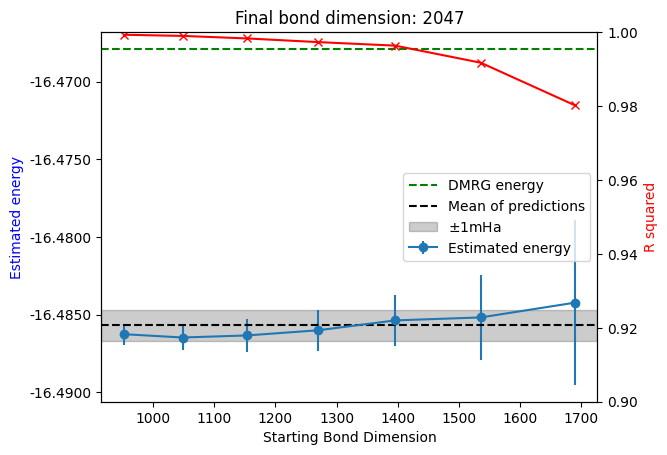

<Figure size 640x480 with 0 Axes>

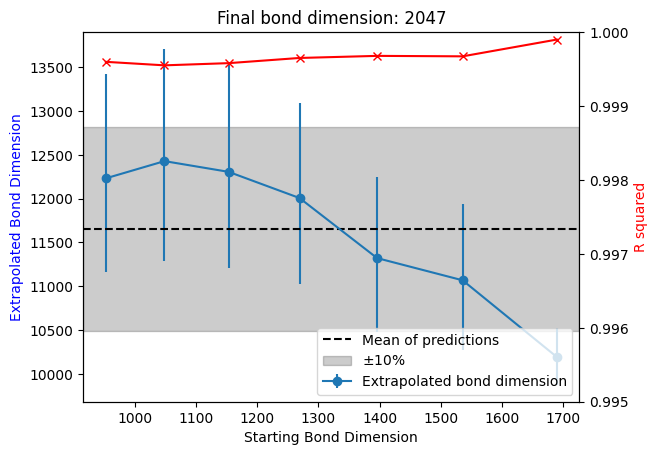

In [13]:
# for extrap_data_dict in fitting_dict_list:
#     start_index = extrap_data_dict["start_index"]
#     start_bond_dimension = extrap_data_dict["start_bond_dimension"]
#     last_bond_dimension_list = extrap_data_dict["last_bond_dimension_list"]
#     last_index_list = extrap_data_dict["last_index_list"]
#     # num_keep_list_final = extrap_data_dict["num_keep_list_final"]
#     est_energies_list = extrap_data_dict["est_energies_list"]
#     r_squared_list = extrap_data_dict["r_squared_list"]
#     intercept_stderr_list = extrap_data_dict["intercept_stderr_list"]
#     slope_list = extrap_data_dict["slope_list"]
#     slope_stderr_list = extrap_data_dict["slope_stderr_list"]
#     best_dmrg_energy_list = extrap_data_dict["best_dmrg_energy_list"]
#     bd_intercept_list = extrap_data_dict["bd_intercept_list"]
#     bd_slope_list = extrap_data_dict["bd_slope_list"]
#     bd_R_squared_list = extrap_data_dict["bd_R_squared_list"]
#     bd_intercept_stderr_list = extrap_data_dict["bd_intercept_stderr_list"]
#     bd_slope_stderr_list = extrap_data_dict["bd_slope_stderr_list"]
#     bd_extrapolated_bd_list = extrap_data_dict["bd_extrapolated_bd_list"]
#     bd_max_bd_list = extrap_data_dict["bd_max_bd_list"]
#     bd_min_bd_list = extrap_data_dict["bd_min_bd_list"]
# Plot est energies and r squared on same plot with num keep as x axis and two different y axes
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.errorbar(start_bond_dimension_list, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
ax2.plot(start_bond_dimension_list, r_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Starting Bond Dimension')
ax1.set_ylabel('Estimated energy', color='b')
ax2.set_ylabel('R squared', color='r')
ax2.set_ylim([0.9,1])
# ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# Format ax1 to have four decimal places in labels with no shift value
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
#Add mean of predictions plus +/- 1mHa bounds
ax1.axhline(y=np.mean(est_energies_list), color='k', linestyle='--', label='Mean of predictions')
x_lim_store = plt.xlim()
ax1.fill_between(plt.xlim(), np.mean(est_energies_list)-1e-3, np.mean(est_energies_list)+1e-3, color='k', alpha=0.2,label=r"$\pm1$mHa")
plt.xlim(x_lim_store)
# ax1.axhline(y=np.mean(est_energies_list)+1e-3, color='r', linestyle='--', label='Mean of predictions +/- 1mHa')
# ax1.axhline(y=np.mean(est_energies_list)-1e-3, color='r', linestyle='--')
# plt.title(
#     f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
# )
plt.title(
    f"Final bond dimension: {int(sorted_bond_dimensions[-1]):d}"
)
# Add legend
ax1.legend()

# Plot BD extrapolation
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
upper_error = np.array(bd_max_bd_list) - np.array(bd_extrapolated_bd_list)
lower_error = np.array(bd_extrapolated_bd_list) - np.array(bd_min_bd_list)
ax1.errorbar(start_bond_dimension_list, bd_extrapolated_bd_list, yerr=np.vstack([lower_error,upper_error]), marker='o', linestyle='-', label='Extrapolated bond dimension')
ax2.plot(start_bond_dimension_list, bd_R_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Starting Bond Dimension')
ax1.set_ylabel('Extrapolated Bond Dimension', color='b')
ax2.set_ylabel('R squared', color='r')
ax2.set_ylim([0.995,1])
# Add mean of predictions plus +/- 10% bounds
ax1.axhline(y=np.mean(bd_extrapolated_bd_list), color='k', linestyle='--', label='Mean of predictions')
x_lim_store = plt.xlim()
ax1.fill_between(plt.xlim(), np.mean(bd_extrapolated_bd_list)-0.1*np.mean(bd_extrapolated_bd_list), np.mean(bd_extrapolated_bd_list)+0.1*np.mean(bd_extrapolated_bd_list), color='k', alpha=0.2,label=r"$\pm10\%$")
plt.xlim(x_lim_store)
# ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# Format ax1 to have four decimal places in labels with no shift value
# ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
# ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# plt.title(
#     f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
# )
plt.title(
    f"Final bond dimension: {int(sorted_bond_dimensions[-1]):d}"
)
# Add legend
ax1.legend(loc='lower right')
print(bd_extrapolated_bd_list)
print(np.vstack([bd_min_bd_list,bd_max_bd_list]))

In [15]:
point_index = 6

to_print_energy = est_energies_list[point_index]
to_print_energy_95_ci = 1.96*intercept_stderr_list[point_index]
to_print_extrapolated_bond_dimension = int(np.round(bd_extrapolated_bd_list[point_index]))
to_print_extrapolated_bond_dimension_lower_bound = int(np.round(bd_min_bd_list[point_index]))
to_print_extrapolated_bond_dimension_upper_bound = int(np.round(bd_max_bd_list[point_index]))

print(f"Start bond dimension: {int(start_bond_dimension_list[point_index])}")
print(f"Estimated energy: {to_print_energy}")
print(f"R squared: {r_squared_list[point_index]}")
print(f"95% CI: +/-{to_print_energy_95_ci:.15f}")
print(f"Extrapolated BD: {to_print_extrapolated_bond_dimension}")
print(f"BD R squared: {bd_R_squared_list[point_index]}")
print(f"BD Interval: [{to_print_extrapolated_bond_dimension_lower_bound}, {to_print_extrapolated_bond_dimension_upper_bound}]")
print(f"BD Interval, percentage: [{100*(bd_min_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%,{100*(bd_max_bd_list[point_index]/bd_extrapolated_bd_list[point_index]-1):.2f}%]")
print(f"Excel: ")
print(f"{to_print_energy},{to_print_energy_95_ci},{to_print_extrapolated_bond_dimension},{to_print_extrapolated_bond_dimension_lower_bound},{to_print_extrapolated_bond_dimension_upper_bound}")
print(f"Extrapolation Dict: ")
#  "c3b3913d-8fe0-4f08-ac1b-b9d4a62ee370": {
#         "energy": -15.535596724273375,
#         "energy_95_ci": 0.000018545210676,
#         "extrapolated_bond_dimension": 1184,
#         "extrapolated_bond_dimension_lower_bound": 780,
#         "extrapolated_bond_dimension_upper_bound": 1840,
# },
print(f'    \"{calc_UUID}\" : {{ # {fcidump_file}')
print(f'        \"energy\": {to_print_energy:.15e},')
print(f'        \"energy_95_ci\": {to_print_energy_95_ci:.15e},')
print(f'        \"extrapolated_bond_dimension\": {to_print_extrapolated_bond_dimension},')
print(f'        \"extrapolated_bond_dimension_lower_bound\": {to_print_extrapolated_bond_dimension_lower_bound},')
print(f'        \"extrapolated_bond_dimension_upper_bound\": {to_print_extrapolated_bond_dimension_upper_bound},')
print("    },")


Start bond dimension: 952
Estimated energy: -16.486264120751258
R squared: 0.999288756164181
95% CI: +/-0.000675210090126
Extrapolated BD: 12231
BD R squared: 0.9995980326607764
BD Interval: [11164, 13419]
BD Interval, percentage: [-8.72%,9.71%]
Excel: 
-16.486264120751258,0.0006752100901260352,12231,11164,13419
Extrapolation Dict: 
    "3cc3c421-93d7-4d36-a717-96b85e5cf1fa" : { # FCIDUMP_L_6x6_Ut_8.0
        "energy": -1.648626412075126e+01,
        "energy_95_ci": 6.752100901260352e-04,
        "extrapolated_bond_dimension": 12231,
        "extrapolated_bond_dimension_lower_bound": 11164,
        "extrapolated_bond_dimension_upper_bound": 13419,
    },
